<a href="https://colab.research.google.com/github/sai-bharghav/Deep-Learning/blob/main/PyTorch_Neural_Network_Classification_02_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classfication in PyTorch

Classification is a problem of predicting whether something or
another (there can be multiple things in the options)


## 1. Make some data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make a 1000 samples

n_samples=1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state=42)
len(X),len(y)

(1000, 1000)

In [2]:
print(f'First 5 samples of X {X[:5]}')
print(f'First 5 Samples of y {y[:5]}')

First 5 samples of X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Samples of y [1 1 1 1 0]


If you look at y we can see that this is a binary classification problems

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


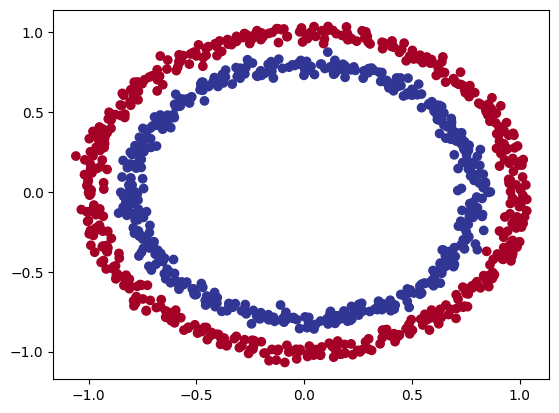

In [4]:
# Visualize the data first
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes


In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the frisst example of features and lables
X_sample = X[0]
y_sample = y[0]


print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


Two features of X trying to predict a label y

### 1.2 Turn data into tensors and create train and test splits



In [7]:
import torch
torch.__version__

'2.2.1+cu121'

* Changing data type of `X` and `y` into tensors since both are numpy arrays
* Then split the data into `X_train`, `X_test`, `y_train`, and `y_test` using `sklearn.model_selection`

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [10]:
# SPlit data into training and test sets
from sklearn.model_selection import train_test_split


X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [11]:
len(X_train), len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [12]:
X_train.shape

torch.Size([800, 2])

## 2. Building a model

Let's build a model to classify our blue and red dots

TO do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclasing `nn.Module`)
3. Define a loss function and ooptimizer
4. Create a training and testing loop

In [13]:
# Import pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now we've set up device agnostic code, let's create a model that:

1. Subclasses `nn.Module` ( almost all models in PyTorch subclass ``nn.Module``)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass(or forward computation) of the model
4. Instantiate an instance of model class and send it to the target device

### Construct a model that subclasses nn.Module


In [14]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the sapes of our data
    self.layer_1 = nn.Linear(in_features =2 , out_features= 5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features=1) # takes the 5 feautres upscaled and then downscale to one feature and it is the output

  # Define a forward() that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # X -> layer_1 -> layer_2-> output

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [15]:
device

'cpu'

In [16]:
next(model_0.parameters()).device # Check what device we are on

device(type='cpu')

In [17]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features = 5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6438,  0.0341],
                      [-0.1299, -0.0976],
                      [-0.0976, -0.6037],
                      [-0.2461,  0.4883],
                      [-0.1362,  0.5252]])),
             ('0.bias', tensor([ 0.3123, -0.5875,  0.4671, -0.1692, -0.6865])),
             ('1.weight',
              tensor([[ 0.2737,  0.2570,  0.1611, -0.2320,  0.2768]])),
             ('1.bias', tensor([-0.0862]))])

In [19]:
# Make some predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions : {len(untrained_preds)},  Shape:{ untrained_preds.shape}')
print(f'Length of test samples : {len(X_test)}, Shape: {X_test.shape}')
print(f'\n First 10 prediction :\n {torch.round(untrained_preds[:10])}')
print(f'\n First 10 lables :\n {y_test[:10]}')

Length of predictions : 200,  Shape:torch.Size([200, 1])
Length of test samples : 200, Shape: torch.Size([200, 2])

 First 10 prediction :
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

 First 10 lables :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [20]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss funciton and  optimizer should we use??

For example for regression you might want MAE or MSE(mean absolute error) or (mean squared error)


For classification you might want binary cross entropy or categorical cross entropy (cross entropy).


As a reminder , the loss function measures how **wrong** our predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.


* For the loss function we're going to use `torch.nn.BCEWithLogitLoss()`
* For a defination on what logit is in deep learning - https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean
* For different optimizers see `torch.optim`

In [21]:
# Setup the loss funciton
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [22]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() # Get more information on torch.eq() https://pytorch.org/docs/stable/generated/torch.eq.html
  # torch.eq() works almost the same as pd.DataFrame(df).isna()
  acc=(correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model, we're going to go through the steps of our training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropogation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities-> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to sime kind of activation fucntion (e.g. sigmoid for binary classification and softmax for multiclass classificaiton).

Then we acn convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [23]:
# View the first 5 outputs of the forward pass on the rest data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3374],
        [-0.3027],
        [-0.3047],
        [-0.3472],
        [-0.1081]])

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4164],
        [0.4249],
        [0.4244],
        [0.4141],
        [0.4730]])

FOr our predcition probability values, we need to perform a range-style roudning on them:

* `y_pred_prbs` >= 0.5 , `y=1`(class 1)
* `y_pred_probs` < 0.5, `y=0 ` (class 0)

In [26]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [27]:
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a training and testing loop

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_trian, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and testing loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # 2. Calculate the loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, # nn.BECWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer Step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)
    # Print out what's happenin
  if epoch %10==0:
    print(f'Epoch: {epoch} | Loss : {loss:.5f} , Acc: {acc:.2f}%| Test Losss : {test_loss:.5f}, Test acc: {test_acc:.2f}%')



Epoch: 0 | Loss : 0.70106 , Acc: 50.00%| Test Losss : 0.70026, Test acc: 50.00%
Epoch: 10 | Loss : 0.69709 , Acc: 43.88%| Test Losss : 0.69639, Test acc: 47.00%
Epoch: 20 | Loss : 0.69574 , Acc: 48.12%| Test Losss : 0.69510, Test acc: 46.50%
Epoch: 30 | Loss : 0.69512 , Acc: 49.25%| Test Losss : 0.69461, Test acc: 46.00%
Epoch: 40 | Loss : 0.69475 , Acc: 49.88%| Test Losss : 0.69439, Test acc: 46.00%
Epoch: 50 | Loss : 0.69448 , Acc: 50.12%| Test Losss : 0.69429, Test acc: 46.50%
Epoch: 60 | Loss : 0.69426 , Acc: 49.88%| Test Losss : 0.69425, Test acc: 47.00%
Epoch: 70 | Loss : 0.69407 , Acc: 50.38%| Test Losss : 0.69423, Test acc: 45.00%
Epoch: 80 | Loss : 0.69392 , Acc: 50.12%| Test Losss : 0.69423, Test acc: 45.00%
Epoch: 90 | Loss : 0.69379 , Acc: 50.00%| Test Losss : 0.69424, Test acc: 47.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything....


So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [29]:
import requests
from pathlib import Path

# Download hhelper functions from Learn PyTorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Download helper functions.py')
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper functions.py


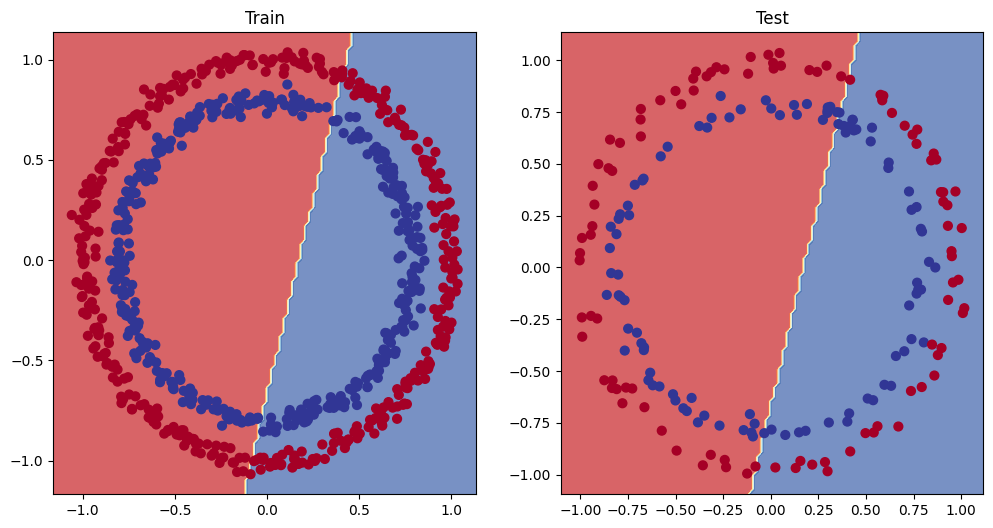

In [30]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving out model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer

* Changing the activation functions.

* Change the learning rate

* Change the loss function

These options are all form a model's perspective beacuse they deal directly with the model, rather than the data.

And beacsue these optons are all values we (as machine learning and data scientists) can change, they are also named as **hyperparameters**


Let's try and improve our model by:
* Adding more hidden units : 5-> 10
* Increase the number so layers 2->3
* Increase the number of epochs 100->1000

In [31]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6132,  0.0669],
                      [-0.1531, -0.0728],
                      [-0.1174, -0.5826],
                      [-0.2228,  0.4633],
                      [-0.1649,  0.5558]])),
             ('0.bias', tensor([ 0.3503, -0.5572,  0.4912, -0.1993, -0.6511])),
             ('1.weight',
              tensor([[ 0.2546,  0.1838,  0.1678, -0.1738,  0.2665]])),
             ('1.bias', tensor([0.0519]))])

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features =10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speeed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Lets go through the things again like
* Create a loss function
* Create an optimizer
* Training and testing loop

In [33]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [34]:
# Trianing and testing loop

epochs = 1000
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_true=y_train, y_pred = y_pred)

  # 3.optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropogation
  loss.backward()

  # 5. Perfrom Gradient Descent
  optimizer.step()

  ### TESTING
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_1(X_test.to(device)).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2.Calculate the loss and accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=torch.round(torch.sigmoid(test_logits)))
  # Print What's happening
  if epoch %10==0:
    print(f'Epoch: {epoch} | Loss : {loss:.5f} , Acc: {acc:.2f}%| Test Losss : {test_loss:.5f}, Test acc: {test_acc:.2f}%')




Epoch: 0 | Loss : 0.69396 , Acc: 49.88%| Test Losss : 0.69261, Test acc: 51.00%
Epoch: 10 | Loss : 0.69369 , Acc: 49.88%| Test Losss : 0.69270, Test acc: 50.00%
Epoch: 20 | Loss : 0.69351 , Acc: 49.88%| Test Losss : 0.69283, Test acc: 49.50%
Epoch: 30 | Loss : 0.69339 , Acc: 49.88%| Test Losss : 0.69297, Test acc: 48.00%
Epoch: 40 | Loss : 0.69329 , Acc: 49.88%| Test Losss : 0.69310, Test acc: 49.00%
Epoch: 50 | Loss : 0.69322 , Acc: 49.88%| Test Losss : 0.69324, Test acc: 50.00%
Epoch: 60 | Loss : 0.69317 , Acc: 49.88%| Test Losss : 0.69336, Test acc: 51.50%
Epoch: 70 | Loss : 0.69312 , Acc: 49.88%| Test Losss : 0.69348, Test acc: 50.50%
Epoch: 80 | Loss : 0.69309 , Acc: 49.88%| Test Losss : 0.69359, Test acc: 50.00%
Epoch: 90 | Loss : 0.69307 , Acc: 49.88%| Test Losss : 0.69370, Test acc: 48.50%
Epoch: 100 | Loss : 0.69305 , Acc: 49.88%| Test Losss : 0.69379, Test acc: 48.00%
Epoch: 110 | Loss : 0.69303 , Acc: 49.88%| Test Losss : 0.69388, Test acc: 46.50%
Epoch: 120 | Loss : 0.69302

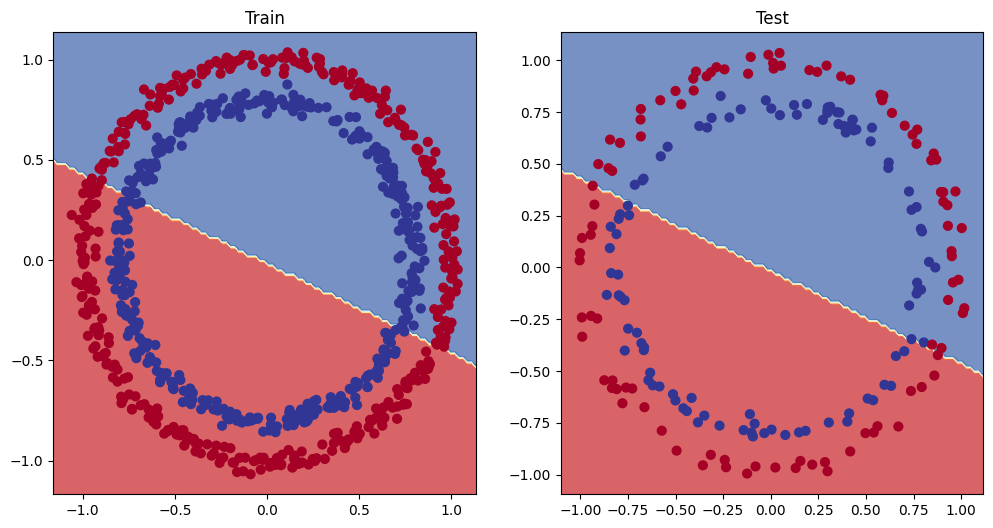

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [36]:
# Create some data (same as notbook_1)
weight = 0.7
bias = 0.3

start = 0
end = 1
step=0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression +bias # Linear regression formulae

# Check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Crreate train and test spllit
train_split = int(0.8*len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:],y_regression[train_split:]



# Chech the lengths of each

len(X_train_regression), len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

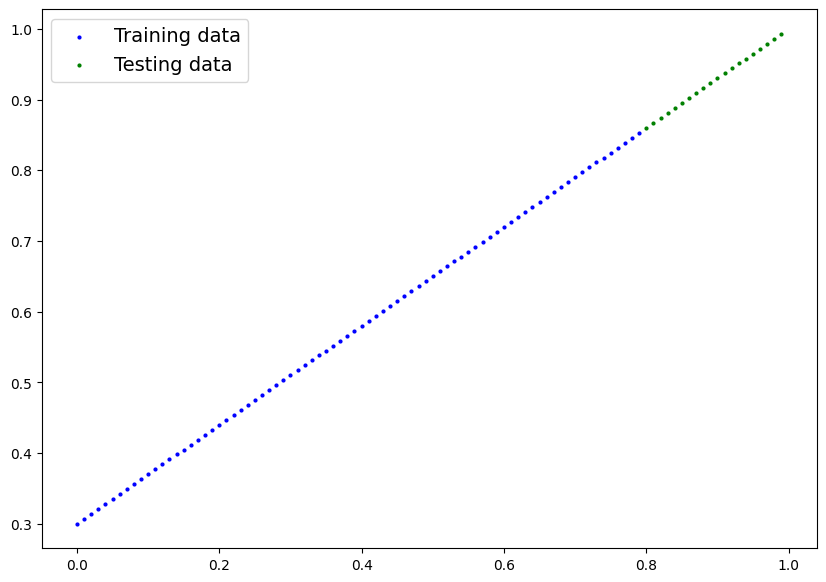

In [38]:
plot_predictions(train_data = X_train_regression,
                train_labels = y_train_regression,
                test_data = X_test_regression,
                test_labels=y_test_regression)

## 5.2 Adjusting `model_1` to fit a straight line

In [39]:
# Smae architecture as model_1 9but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Loss and Optimizier
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [41]:
# Train the model

# Set the epochs
epochs = 1000

# Put data on the target device

X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred= model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  # Print out what's happeing
  if epoch%100==0:
    print(f"Epoch :{epoch} | Loss:{loss} | Test_loss:{test_loss}")

Epoch :0 | Loss:0.5789582133293152 | Test_loss:0.47265028953552246
Epoch :100 | Loss:0.05652392655611038 | Test_loss:0.17491014301776886
Epoch :200 | Loss:0.052717894315719604 | Test_loss:0.15037742257118225
Epoch :300 | Loss:0.0573289580643177 | Test_loss:0.14732596278190613
Epoch :400 | Loss:0.05779872462153435 | Test_loss:0.14757704734802246
Epoch :500 | Loss:0.0494253896176815 | Test_loss:0.12419413030147552
Epoch :600 | Loss:0.052834492176771164 | Test_loss:0.1434975117444992
Epoch :700 | Loss:0.07243607938289642 | Test_loss:0.12573875486850739
Epoch :800 | Loss:0.044932663440704346 | Test_loss:0.11135085672140121
Epoch :900 | Loss:0.05376843735575676 | Test_loss:0.13252095878124237


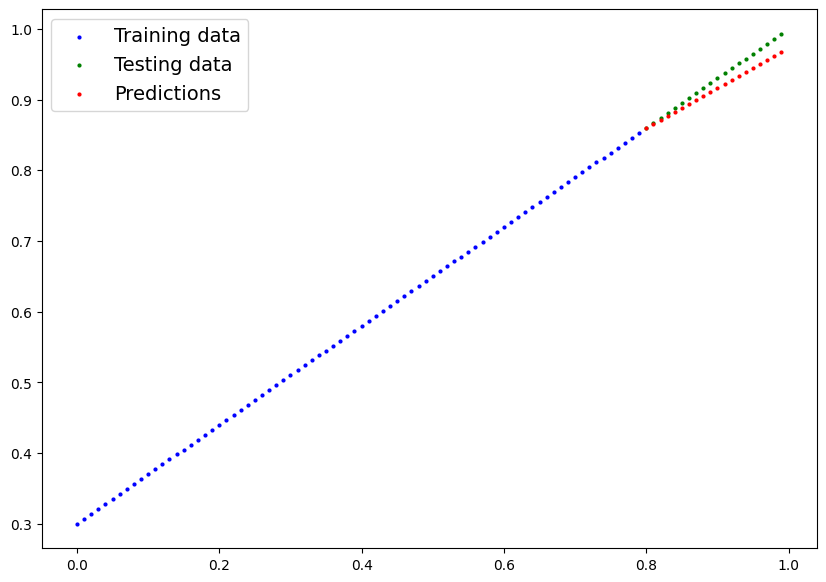

In [42]:
# Turn on evaluation mode
model_2.eval()

# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plt data and predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(), test_data = X_test_regression.cpu(), test_labels = y_test_regression.cpu(), predictions = y_preds.cpu())

## 6. The missing of our model : Non-Linearity

* What pattersn could you draw if you were given an infinite amoun of a straight and non-staright lines?

Or in machine learning terms, an infinite (but really is finite)  of linear and non linear functions

### 6.1 Recreating non-linear data (red and blue circles)

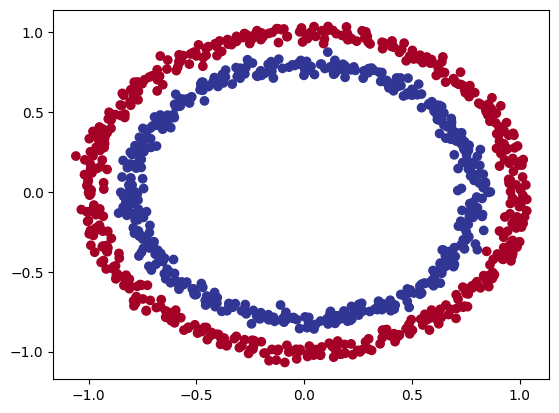

In [43]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [44]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Buidling a model with Non -linearity

* Linear = straight line
* Non-Linear = non-straight line

Artificial neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data.

In [45]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features=10)
    self.layer2 = nn.Linear(in_features = 10, out_features=10)
    self.layer3 = nn.Linear(in_features = 10, out_features=1)
    self.relu = nn.ReLU()# relu is a non-linear activation functions

  def forward(self,x):
    # Where should we keep our ReLU()?
    return (self.layer3(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_3.parameters(),lr=0.1)



### 6.3 Training the model with non linearity

In [47]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train , y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


# loop through data
epochs = 1000

for epoch in range(epochs):
  ## Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_pred = y_pred, y_true = y_train)

  # 3. Optimizer zero grad()
  optimizer.zero_grad()

  #4. backward propogation
  loss.backward()

  # 5. Perform Gradient descent
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_pred=test_pred, y_true=y_test)

  # Print out what's happening
  if epoch%100==0:
    print(f'Epoch :{epoch} | Loss : {loss} | Test loss: {test_loss} | test_acc: {test_acc}')

Epoch :0 | Loss : 0.6992805600166321 | Test loss: 0.6947956085205078 | test_acc: 51.5
Epoch :100 | Loss : 0.6909511685371399 | Test loss: 0.689170777797699 | test_acc: 55.50000000000001
Epoch :200 | Loss : 0.687345564365387 | Test loss: 0.6863501667976379 | test_acc: 57.49999999999999
Epoch :300 | Loss : 0.68206787109375 | Test loss: 0.6820381879806519 | test_acc: 81.5
Epoch :400 | Loss : 0.6726765632629395 | Test loss: 0.6743082404136658 | test_acc: 82.5
Epoch :500 | Loss : 0.6543540358543396 | Test loss: 0.6598314642906189 | test_acc: 84.0
Epoch :600 | Loss : 0.6179298758506775 | Test loss: 0.6303445100784302 | test_acc: 86.0
Epoch :700 | Loss : 0.5476153492927551 | Test loss: 0.5711762309074402 | test_acc: 91.5
Epoch :800 | Loss : 0.42921653389930725 | Test loss: 0.46983200311660767 | test_acc: 92.0
Epoch :900 | Loss : 0.2863399088382721 | Test loss: 0.3345785439014435 | test_acc: 97.0


### 6.4 Evaluating our model with non-linear functions

In [48]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

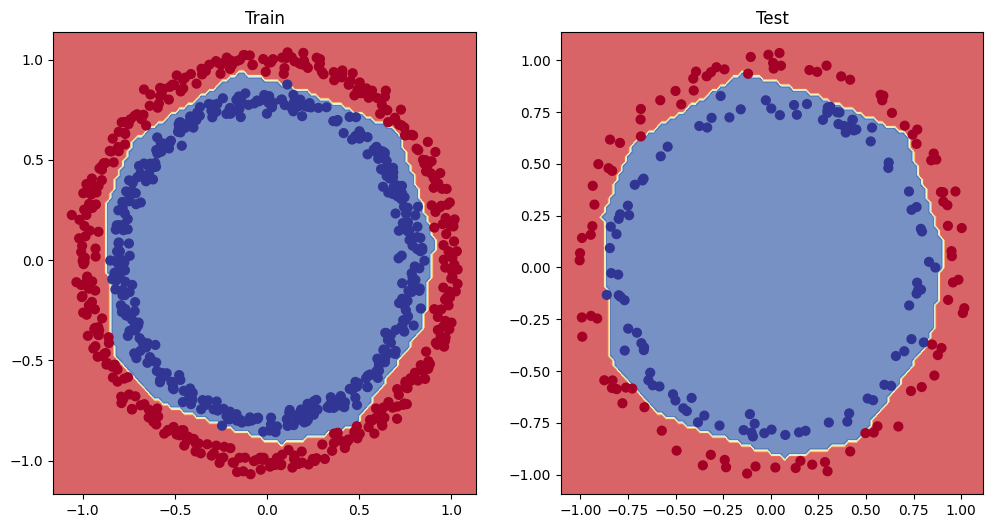

In [49]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in the data and it tires to figure out the patterns

And these are linear and non-linear functions

In [50]:
# Create a tensor

A = torch.arange(-10,10,1,dtype = torch.float32)
A.dtype

torch.float32

In [51]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

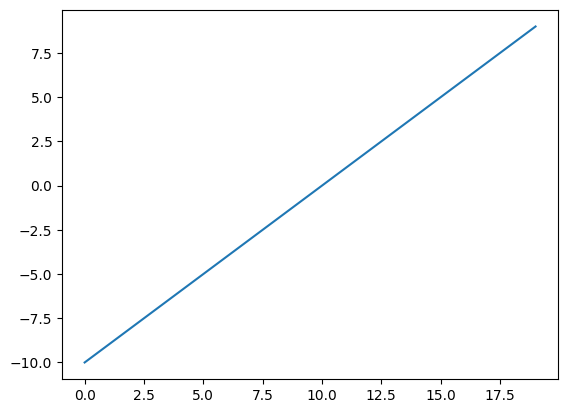

In [52]:
# Visualize the data
plt.plot(A)

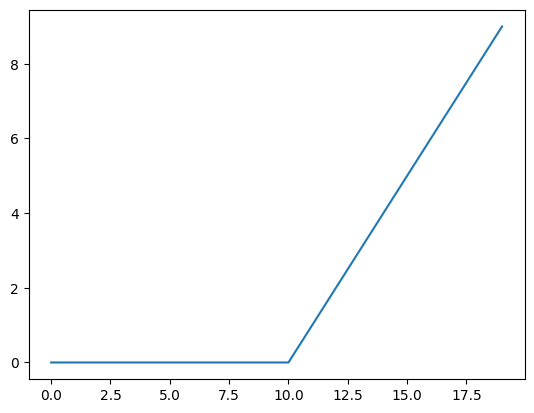

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [55]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

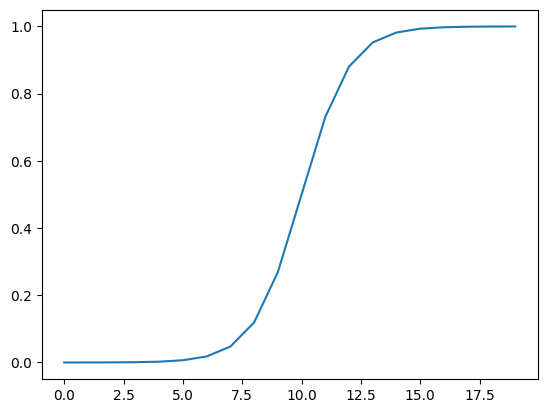

In [56]:
plt.plot(torch.sigmoid(A))

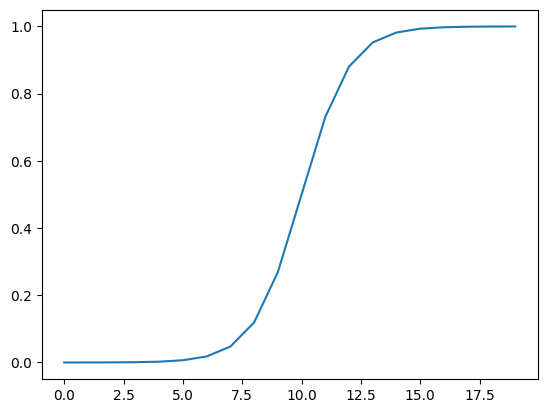

In [57]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classificaiton

* Binary Classification - one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi class Classification - (cat vs dog vs chicken)

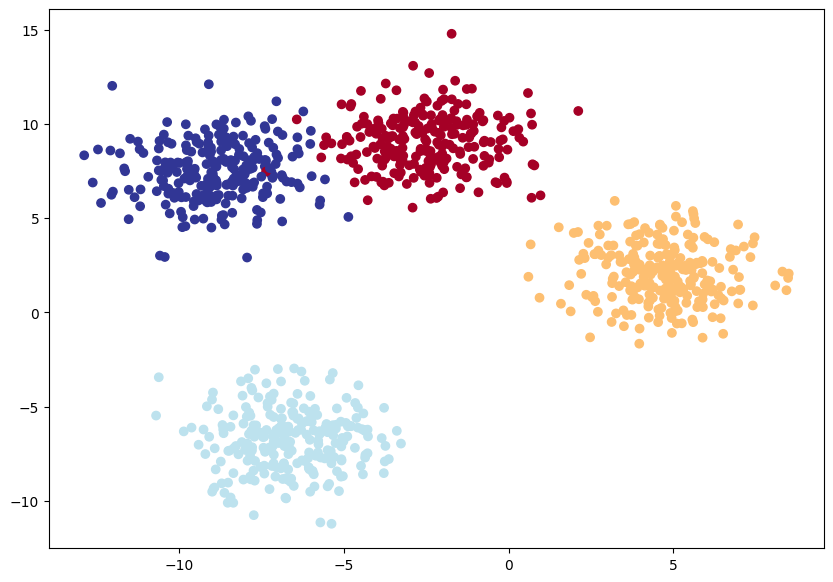

In [58]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED=42


# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES, centers = NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test data
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,random_state=42, test_size=0.2)


# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Buidling a Multi class classification model in PyTorch

In [59]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [60]:
# Build a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features,output_features,hidden_units=8):
    """ Initializes multi-class classification model

    Args:
    input_features (int): Number of input features to the model
    output_features(int): Number of output features (number of output classes)
    hidden_units (int) : Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


# Create an instance of Blob Model
model_4 = BlobModel(input_features = 2, output_features = 4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [61]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for a multi-class classification model


In [62]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()# Measures how wrong our model's predictions are

# Set up an optimizer ---> Updates the model parameters to reduce the loss
optimizer = torch.optim.SGD(
    params=model_4.parameters(),
    lr=0.1
)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels

Logits (raw output of the model)-> Pred probs (use `torch.softmax()`)-> Pred Labels(take the argmax of the prediction probabilities) on dim =1

In [63]:
# Let's get some raw predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10] # Let's see what our outputs are


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [64]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])

In [65]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)

y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

### 8.5 Training a model (multi-class classification)

In [66]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set the number of epochs
epochs = 100

# Put the data to the target device
X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)


# Lopp through data
for epoch in range(epochs):
  # Training
  model_4.train()

  # Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # Calculate the loss
  loss= loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## TESTING
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true =y_blob_test ,y_pred=test_preds)
  # Print out what's happening
  if epoch%10==0:
    print(f'Epoch : {epoch} | Loss : {loss} | test_loss : {test_loss} | test_acc :{test_acc}')

Epoch : 0 | Loss : 1.1588267087936401 | test_loss : 1.0755422115325928 | test_acc :48.0
Epoch : 10 | Loss : 0.6447553038597107 | test_loss : 0.660687267780304 | test_acc :97.5
Epoch : 20 | Loss : 0.4253515303134918 | test_loss : 0.43074119091033936 | test_acc :100.0
Epoch : 30 | Loss : 0.2529422640800476 | test_loss : 0.24507610499858856 | test_acc :99.5
Epoch : 40 | Loss : 0.11232147365808487 | test_loss : 0.10228512436151505 | test_acc :99.5
Epoch : 50 | Loss : 0.06626509130001068 | test_loss : 0.058475371450185776 | test_acc :99.5
Epoch : 60 | Loss : 0.05068016052246094 | test_loss : 0.042932283133268356 | test_acc :99.5
Epoch : 70 | Loss : 0.04299675300717354 | test_loss : 0.034909654408693314 | test_acc :99.5
Epoch : 80 | Loss : 0.038361385464668274 | test_loss : 0.02987821027636528 | test_acc :99.5
Epoch : 90 | Loss : 0.03524842858314514 | test_loss : 0.02662651054561138 | test_acc :99.5


### 8.6 Making and evaluating with a Pytorch mutliclass model

In [67]:
#Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [68]:
# Go from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [69]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [70]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [71]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

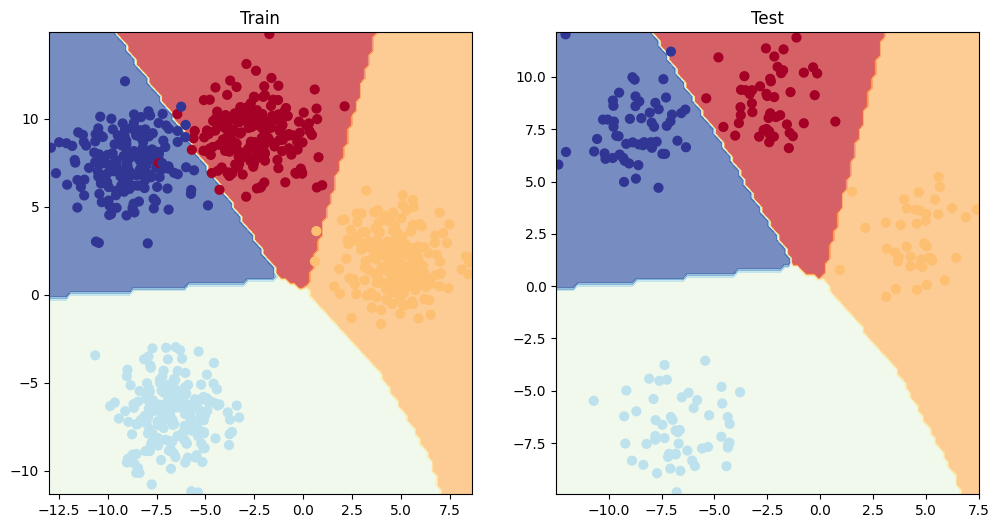

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classification metrics.... (to evaluate our classification model)

* Accuracy - out of 100 samples how many our model get it right
* Precision -
* Recall
* F1-score
* Confusion Matrix
* Classification report


Better blog to read on accuracy, precision and recall- [Check the article](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

In [74]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 866.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [86]:
from torchmetrics import Accuracy

# Setup the metric
torchmetric_accuracy = Accuracy(task='multiclass',num_classes=4).to(device) # When installed or instanciated we get the device it is on is cpu so we have to write device agnostic code

# Calculate the accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)